In [ ]:
Notes:
    Added contextily with conda-forge
    
    conda install -c conda-forge --name ancestry-map contextily

In [1]:
# import libraries

import pandas as pd
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime
import contextily as cx

In [24]:
# load data from the csv in the data directory
    #df = pd.read_csv('../data/geolife_small.csv', delimiter=';')
    #df

df = pd.read_csv('../data/moving_people_data.csv', delimiter=',')

df

,ID,Person,City,State,Country,Start_Date,lat,lon
0,1,Ida,Kurikka,,Finland,1888,62.616816,22.398791
1,1,Ida,Bayfield,Wisconsin,United States,1913,46.811654,-90.817817
2,1,Ida,Ironwood,Michigan,United States,1930,46.455051,-90.151911
3,2,Constance,Bayfield,Wisconsin,United States,1913,46.811654,-90.817817
4,2,Constance,Ironwood,Michigan,United States,1930,46.455051,-90.151911
5,2,Constance,Sault Ste Marie,Michigan,United States,1935,46.486489,-84.360710
6,2,Constance,Luddington,Michigan,United States,1954,43.962553,-86.445802
7,2,Constance,Camarillo,California,United States,1996,34.226584,-119.035771


In [25]:
df.dtypes

ID              int64
Person         object
City           object
State          object
Country        object
Start_Date      int64
lat           float64
lon           float64
dtype: object

In [26]:
# convert the year column into a datetime field
df['t']=df['Start_Date'].apply(lambda row: datetime(row, 1, 1))


df

,ID,Person,City,State,Country,Start_Date,lat,lon,t
0,1,Ida,Kurikka,,Finland,1888,62.616816,22.398791,1888-01-01
1,1,Ida,Bayfield,Wisconsin,United States,1913,46.811654,-90.817817,1913-01-01
2,1,Ida,Ironwood,Michigan,United States,1930,46.455051,-90.151911,1930-01-01
3,2,Constance,Bayfield,Wisconsin,United States,1913,46.811654,-90.817817,1913-01-01
4,2,Constance,Ironwood,Michigan,United States,1930,46.455051,-90.151911,1930-01-01
5,2,Constance,Sault Ste Marie,Michigan,United States,1935,46.486489,-84.360710,1935-01-01
6,2,Constance,Luddington,Michigan,United States,1954,43.962553,-86.445802,1954-01-01
7,2,Constance,Camarillo,California,United States,1996,34.226584,-119.035771,1996-01-01


In [27]:
# create the trajectory collection

traj_collection = mpd.TrajectoryCollection(df, traj_id_col='ID', t='t', x='lon', y='lat')
print(traj_collection)

TrajectoryCollection with 2 trajectories


C:\Users\mmtobias\Anaconda3\envs\ancestry-map\lib\site-packages\movingpandas\trajectory_collection.py:155: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for traj_id, values in df.groupby([traj_id_col]):


In [28]:
my_traj = traj_collection.trajectories[0]
print(my_traj)

Trajectory 1 (1888-01-01 00:00:00 to 1930-01-01 00:00:00) | Size: 3 | Length: 6583722.5m
Bounds: (-90.817817, 46.455051, 22.398791, 62.616816)
LINESTRING (22.398791 62.616816, -90.81781700000001 46.811654, -90.151911 46.455051)


C:\Users\mmtobias\Anaconda3\envs\ancestry-map\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\mmtobias\Anaconda3\envs\ancestry-map\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\mmtobias\Anaconda3\envs\ancestry-map\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\mmtobias\Anaconda3\envs\ancestry-map\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a num

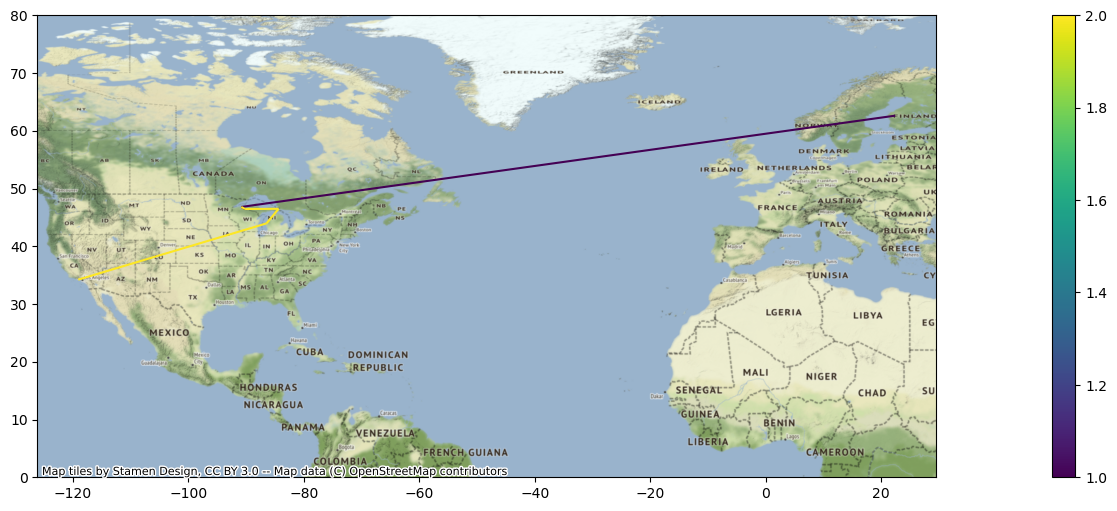

In [44]:
#plot the trajectory collection
myplot=traj_collection.plot(column='ID', legend=True, figsize=(30,6))
myplot.set_ylim(0,80)
cx.add_basemap(myplot, crs=4326, zoom = 4)